In [1]:
#AI-データサイエンスのための図解でわかる数学プログラミング

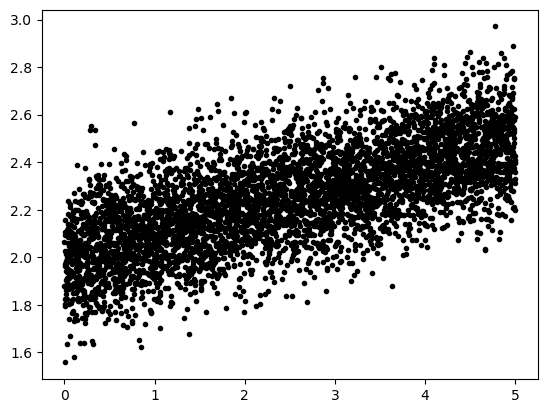

In [3]:
# 8-4 深層学習ライブラリを使って直線グラフを予測してみよう
# データ読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# データ読み込み
df_sample = pd.read_csv("AI-データサイエンスのための図解でわかる数学プログラミング/MathProgramming/Chapter8-jupyter/sample_linear.csv")
sample = df_sample.values

# 読み込みデータ可視化
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y,marker=".",color="k")
plt.show()
%matplotlib inline

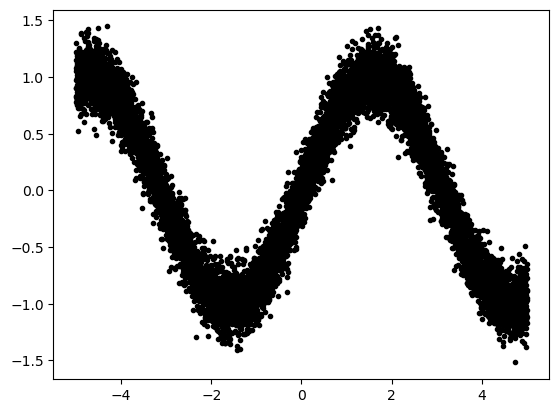

In [5]:
# 8-5 深層学習ライブラリを使って曲線グラフを予測してみよう
# データ読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# データ読み込み
df_sample = pd.read_csv("AI-データサイエンスのための図解でわかる数学プログラミング/MathProgramming/Chapter8-jupyter/sample_sin.csv")
sample = df_sample.values

# 読み込みデータ可視化
x = sample[:,0]
y = sample[:,1]
plt.scatter(x,y,marker=".",color="k")
plt.show()
%matplotlib inline

2022-11-24 00:29:25.013499: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


313/313 [==============================] - 0s 742us/step


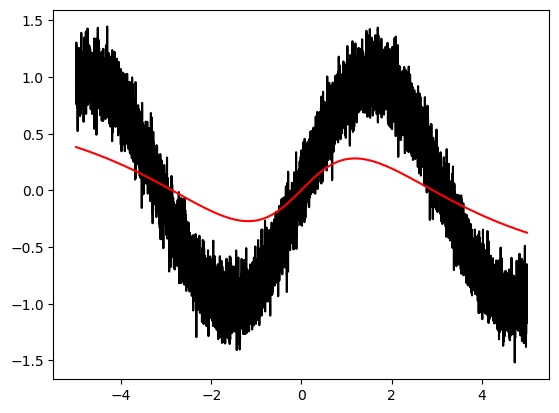

In [6]:
# Kerasによる曲線近似
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# パラメータ設定
num_epochs = 1

# モデル作成
model = Sequential()
model.add(Dense(20, activation="tanh", input_dim=1))
model.add(Dense(20, activation="tanh"))
model.add(Dense(1))
model.add(Dense(1, input_dim=1))

# 最適化計算
model.compile(optimizer='sgd',
              loss='mean_squared_error')

# トレーニング(曲線近似)
model.fit(x, y,batch_size=100,epochs=num_epochs)

# 予測結果出力
pred = model.predict(x)

# 予測結果可視化
plt.plot(x, y, color="k")
plt.plot(x, pred, color="r")
plt.show()

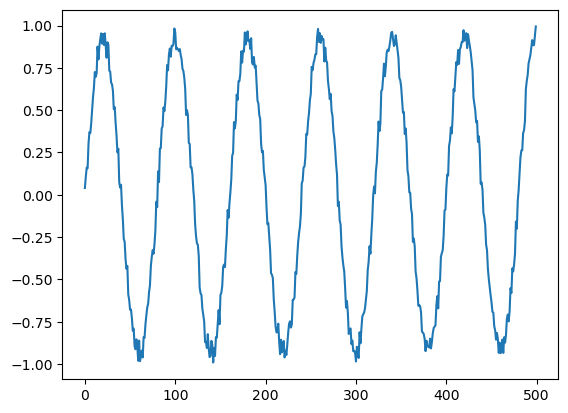

In [8]:
# 9-2 RNNを使ってsin波を予測してみよう
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import os

#シード値の固定
seed = 1
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)
%matplotlib inline

#データの読み込み
data = np.loadtxt("AI-データサイエンスのための図解でわかる数学プログラミング/MathProgramming/Chapter9-jupyter/rnn_sin_40_80.csv")
plt.plot(data[:500])
plt.show()

In [10]:
#history_stepsステップ数を入力に使い、future_stepsステップ数を予測する様にデータを加工する
def create_dataset(data, history_steps, future_steps):
    input_data = []
    output_data= []

    for i in range(len(data)-history_steps-future_steps):
        input_data.append([[val] for val in data[i:i+history_steps]])
        output_data.append(data[i+history_steps:i+history_steps+future_steps])

    return np.array(input_data), np.array(output_data)

train_data = data[:int(len(data) * 0.75)]
test_data = data[int(len(data) * 0.75):]

#10ステップ分のデータから５ステップ未来までを予測するようなデータを作成する
history_steps = 10
future_steps = 5
x_train, y_train = create_dataset(train_data, history_steps, future_steps)
x_test, y_test   = create_dataset(test_data, history_steps, future_steps)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2385, 10, 1)
(2385, 5)
(785, 10, 1)
(785, 5)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

#モデルの構築
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=future_steps, input_shape=(history_steps,1),return_sequences=False))
model_rnn.add(Dense(future_steps,activation="linear"))
model_rnn.compile(optimizer = Adam(lr=0.001), loss="mean_squared_error",)

#モデルの構造を表示する
print(model_rnn.summary())

#学習開始
history = model_rnn.fit(x_train, y_train, batch_size=32, epochs=500, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500


/Users/nishiyamashoutou/opt/anaconda3/envs/grad_project/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


75/75 [==============================] - 1s 4ms/step - loss: 0.4821
Epoch 2/500
75/75 [==============================] - 0s 4ms/step - loss: 0.2468
Epoch 3/500
75/75 [==============================] - 0s 3ms/step - loss: 0.1291
Epoch 4/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0703
Epoch 5/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 6/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0347
Epoch 7/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0299
Epoch 8/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 9/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 10/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 11/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 12/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 13/500
75/75 [=============================

75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 103/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 104/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 105/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 106/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 107/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 108/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 109/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 110/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 111/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 112/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 113/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 114/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 203/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 204/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 205/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 206/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 207/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 208/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 209/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 210/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 211/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 212/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 213/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 214/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 303/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 304/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 305/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 306/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 307/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 308/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 309/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 310/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 311/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 312/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 313/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 314/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 403/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 404/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 405/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 406/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 407/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 408/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 409/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 410/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 411/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 412/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 413/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 414/500
75/75 [=========

25/25 [==============================] - 0s 1ms/step


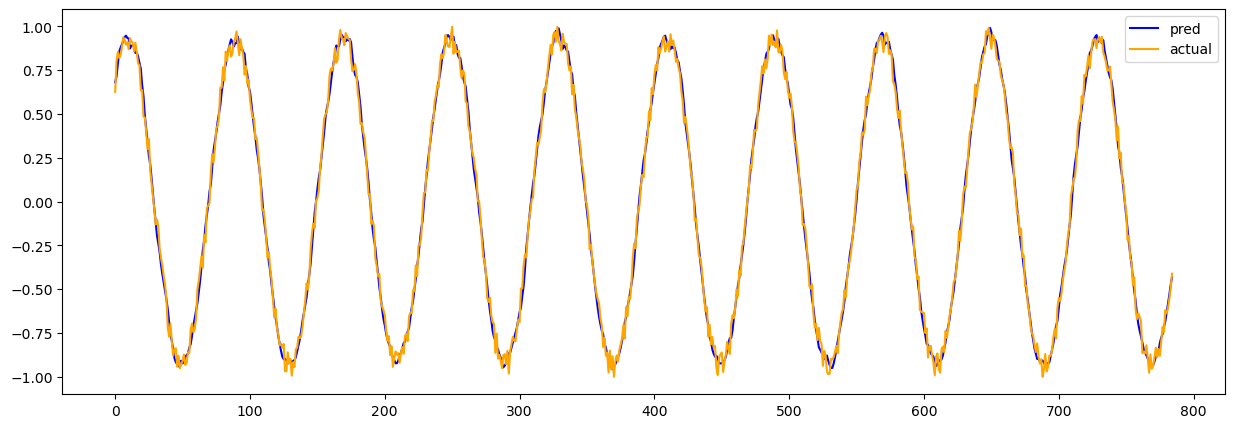

In [12]:
# 9-3 RNNで予測したsin波の評価をしてみよう
#学習したモデルで予測をする
y_pred = model_rnn.predict(x_test)

plt.figure(figsize=(15,5))
#青色で予測値、オレンジ色で実際の値を表示
plt.plot([p[0] for p in y_pred],color="blue",label="pred")
plt.plot([p[0] for p in y_test],color="orange",label="actual")
plt.legend()
plt.show()

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 13ms/step


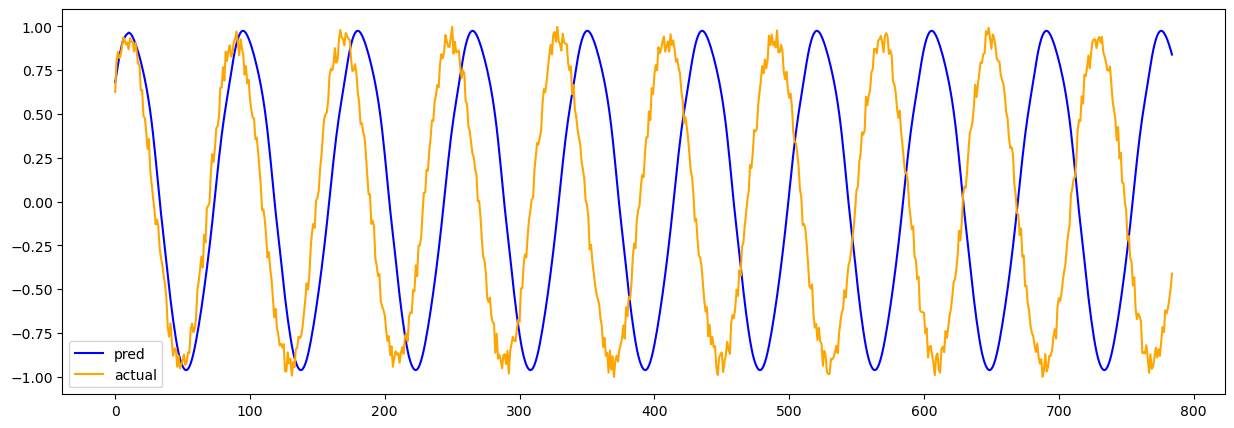

In [13]:
#学習済みモデルと予測に用いる値、実際の値の３つを引数に取る
def predict_all(model, x_test, y_test):

    #最初のhistory_steps分だけ利用する。
    x_tmp = x_test[0]
    pred_result = []
    for index in range(len(y_test)):
        #x_tmpに入っているデータで予測をする
        pred = model.predict(np.array([x_tmp]))

        #x_tmpの最初のデータを削除して、末尾に今回予測したデータの最初の一つを追加する
        x_tmp = np.append(x_tmp[1:,], pred[0][0].reshape(1,1), axis=0)
        pred_result.append(pred[0][0])

    plt.figure(figsize=(15,5))
    #予測した値をと実際の値を表示する
    plt.plot(pred_result,color="blue", label="pred")
    plt.plot([p[0] for p in y_test],color="orange", label="actual")
    plt.legend()
    plt.show()

#予測開始
predict_all(model_rnn, x_test, y_test)

In [14]:
# 9-4 CNNでもsin波の予測をしてみよう
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D

#モデルの構築
model_conv = Sequential()
model_conv.add(Conv1D(filters=64, kernel_size=4, strides=1, padding='same', input_shape=x_train.shape[1:], activation='relu'))
model_conv.add(Conv1D(filters=128, kernel_size=4,strides=1, padding='same', activation='relu'))
model_conv.add(GlobalMaxPooling1D())
model_conv.add(Dense(future_steps, activation='tanh'))
model_conv.compile(optimizer = Adam(lr=0.001), loss='mean_squared_error')

#モデルの構造を表示する
print(model_conv.summary())

#予測開始
history = model_conv.fit(x_train, y_train, batch_size=32, epochs=500, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            320       
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           32896     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 33,861
Trainable params: 33,861
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
75/75 [==============================] - 1s 3ms/step - loss: 0.1135
Epoch 2/500
75/75 [============

75/75 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 90/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 91/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 92/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 93/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 94/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 95/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 96/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 97/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 98/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 99/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 100/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 101/500
75/75 [===================

75/75 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 190/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 191/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 192/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 193/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 194/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 195/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 196/500
75/75 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 197/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 198/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 199/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 200/500
75/75 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 201/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 290/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 291/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 292/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 293/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 294/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 295/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 296/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 297/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 298/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 299/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 300/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 301/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 390/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 391/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 392/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 393/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 394/500
75/75 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 395/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 396/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 397/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 398/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 399/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 400/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 401/500
75/75 [=========

75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 490/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 491/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 492/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 493/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 494/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 495/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 496/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 497/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 498/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 499/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 500/500
75/75 [==============================] - 0s 3ms/step - loss: 0.0016


25/25 [==============================] - 0s 2ms/step


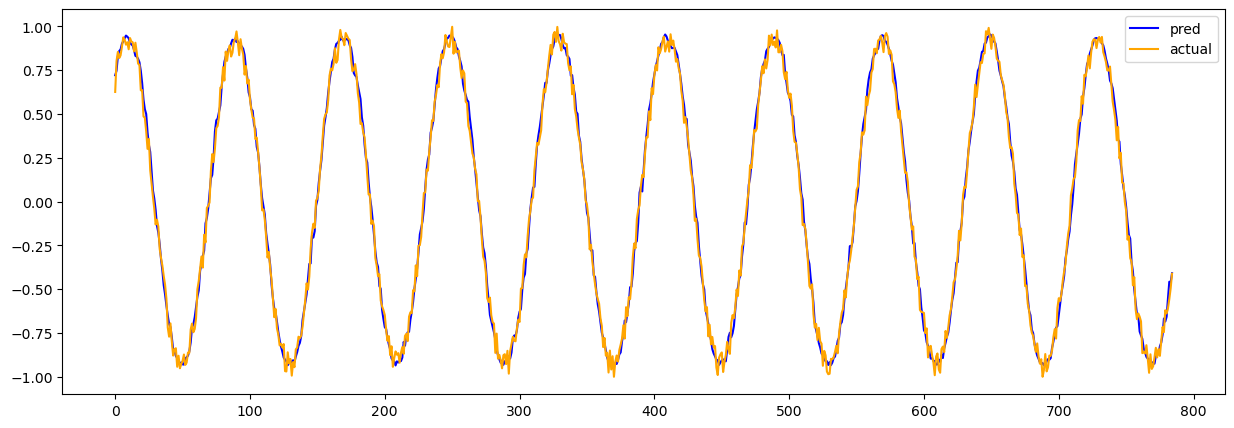

In [15]:
#予測開始
y_pred = model_conv.predict(x_test)

plt.figure(figsize=(15,5))
plt.plot([p[0] for p in y_pred],color="blue",label="pred")
plt.plot([p[0] for p in y_test],color="orange",label="actual")
plt.legend()
plt.show()

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step


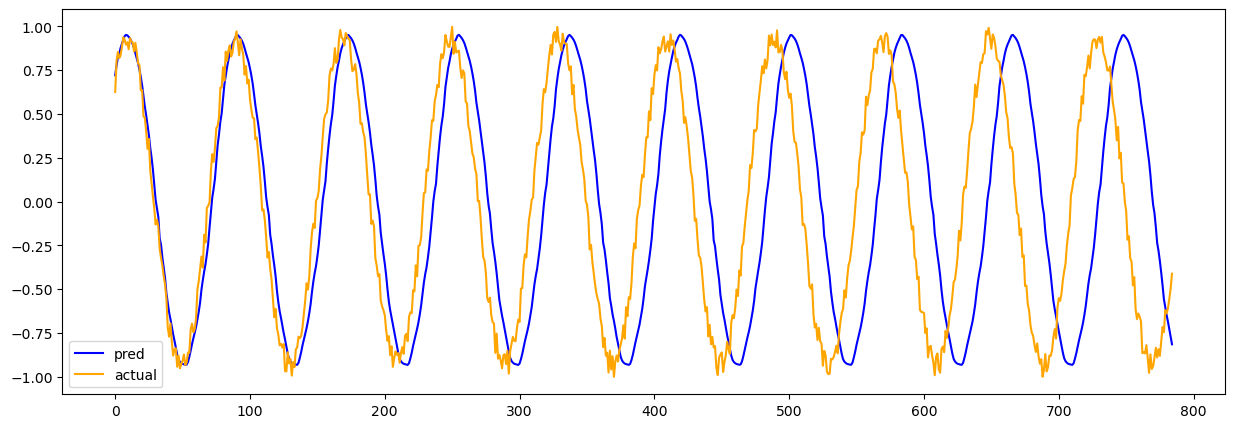

In [16]:
predict_all(model_conv, x_test, y_test)

In [17]:
# 9-5 sin波の予測精度を高めよう
history_steps_v2 = 40
future_steps_v2 = 10

#40ステップ分のデータから10ステップ未来までを予測するようなデータを作成する
x_train_v2, y_train_v2 = create_dataset(train_data, history_steps_v2, future_steps_v2)
x_test_v2, y_test_v2   = create_dataset(test_data, history_steps_v2, future_steps_v2)


print(x_train_v2.shape)
print(y_train_v2.shape)

(2350, 40, 1)
(2350, 10)


In [18]:
#RNNのモデル構築
model_rnn_v2 = Sequential()
model_rnn_v2.add(SimpleRNN(units=future_steps_v2, input_shape=(history_steps_v2,1),return_sequences=False))
model_rnn_v2.add(Dense(future_steps_v2,activation="linear"))
model_rnn_v2.compile(optimizer = Adam(lr=0.001), loss="mean_squared_error",)

#モデルの構造を表示する
print(model_rnn_v2.summary())

#学習開始
history = model_rnn_v2.fit(x_train_v2, y_train_v2, batch_size=32, epochs=500, verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
74/74 [==============================] - 1s 9ms/step - loss: 0.4029
Epoch 2/500
74/74 [==============================] - 1s 7ms/step - loss: 0.1225
Epoch 3/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0623
Epoch 4/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0389
Epoch 5/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0280
Epoch 6/500
74/74 [============================

74/74 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 94/500
74/74 [==============================] - 1s 12ms/step - loss: 0.0021
Epoch 95/500
74/74 [==============================] - 1s 15ms/step - loss: 0.0021
Epoch 96/500
74/74 [==============================] - 1s 14ms/step - loss: 0.0021
Epoch 97/500
74/74 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 98/500
74/74 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 99/500
74/74 [==============================] - 2s 20ms/step - loss: 0.0021
Epoch 100/500
74/74 [==============================] - 1s 16ms/step - loss: 0.0021
Epoch 101/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 102/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 103/500
74/74 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 104/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 105/500
74/74 [======

74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 193/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 194/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 195/500
74/74 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 196/500
74/74 [==============================] - 1s 11ms/step - loss: 0.0020
Epoch 197/500
74/74 [==============================] - 1s 11ms/step - loss: 0.0020
Epoch 198/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 199/500
74/74 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 200/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 201/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 202/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 203/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 204/500
74/74 [=====

74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 292/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0021
Epoch 293/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 294/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 295/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 296/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 297/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 298/500
74/74 [==============================] - 1s 11ms/step - loss: 0.0020
Epoch 299/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 300/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 301/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 302/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 303/500
74/74 [========

74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 391/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 392/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 393/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 394/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 395/500
74/74 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 396/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 397/500
74/74 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 398/500
74/74 [==============================] - 1s 10ms/step - loss: 0.0020
Epoch 399/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 400/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 401/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 402/500
74/74 [======

74/74 [==============================] - 1s 7ms/step - loss: 0.0020
Epoch 490/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 491/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 492/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 493/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 494/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 495/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 496/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 497/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 498/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 499/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 500/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0020


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 30ms/step


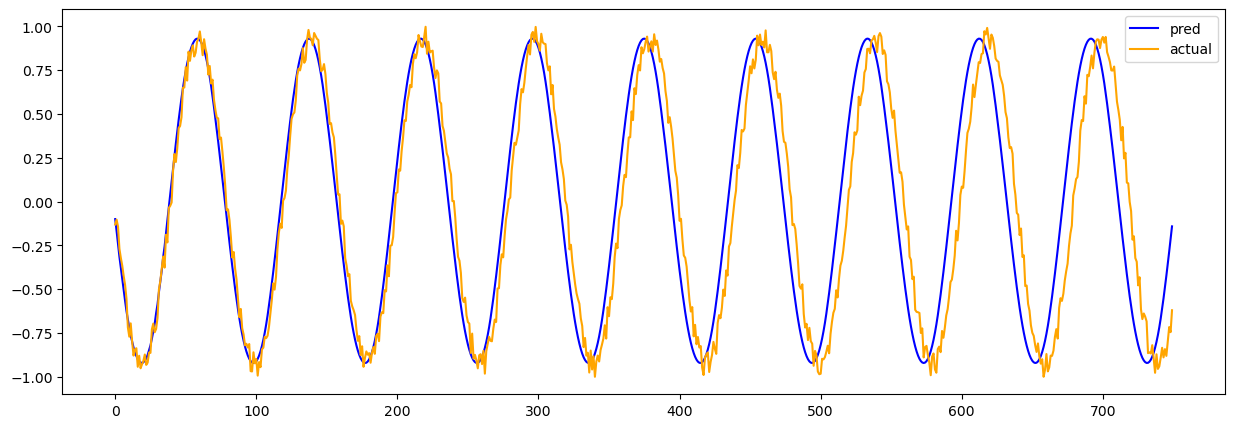

In [19]:
predict_all(model_rnn_v2, x_test_v2, y_test_v2)

In [20]:
#CNNのモデルを構築
model_conv_v2 = Sequential()
model_conv_v2.add(Conv1D(filters=64, kernel_size=4, strides=1, padding='same', input_shape=x_train_v2.shape[1:], activation='relu'))
model_conv_v2.add(Conv1D(filters=128, kernel_size=4,strides=1, padding='same', activation='relu'))
model_conv_v2.add(GlobalMaxPooling1D())
model_conv_v2.add(Dense(future_steps_v2, activation='tanh'))
model_conv_v2.compile(optimizer = Adam(lr=0.001), loss='mean_squared_error')

#モデルの構造を表示
print(model_conv_v2.summary())

#学習開始
history = model_conv_v2.fit(x_train_v2, y_train_v2, batch_size=32, epochs=500, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 40, 64)            320       
                                                                 
 conv1d_3 (Conv1D)           (None, 40, 128)           32896     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 34,506
Trainable params: 34,506
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/500
74/74 [==============================] - 2s 9ms/step - loss: 0.1552
Epoch 2/500
74/74 [============

74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 90/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0023
Epoch 91/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 92/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 93/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 94/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 95/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0021
Epoch 96/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 97/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 98/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0022
Epoch 99/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 100/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 101/500
74/74 [===================

74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 190/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 191/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0019
Epoch 192/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 193/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0019
Epoch 194/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 195/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 196/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 197/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 198/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 199/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 200/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 201/500
74/74 [=========

74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 290/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 291/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 292/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 293/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0018
Epoch 294/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 295/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 296/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 297/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0017
Epoch 298/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 299/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 300/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 301/500
74/74 [=========

74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 390/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 391/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 392/500
74/74 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 393/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 394/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0017
Epoch 395/500
74/74 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 396/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 397/500
74/74 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 398/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0017
Epoch 399/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 400/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 401/500
74/74 [=========

74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 490/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 491/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 492/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 493/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 494/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 495/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 496/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 497/500
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 498/500
74/74 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 499/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 500/500
74/74 [==============================] - 0s 6ms/step - loss: 0.0016


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


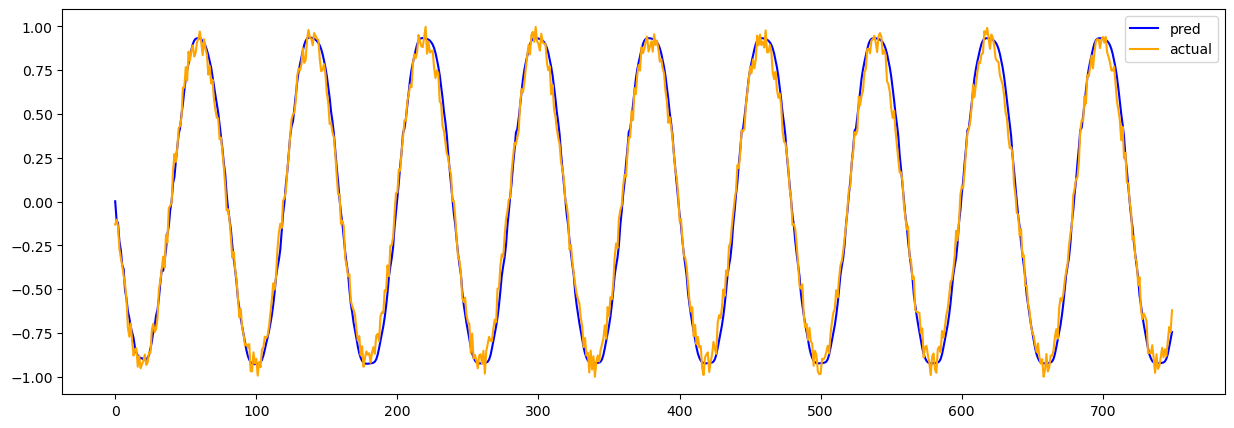

In [21]:
predict_all(model_conv_v2, x_test_v2, y_test_v2)

In [22]:
# Pythonによる予測分析

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

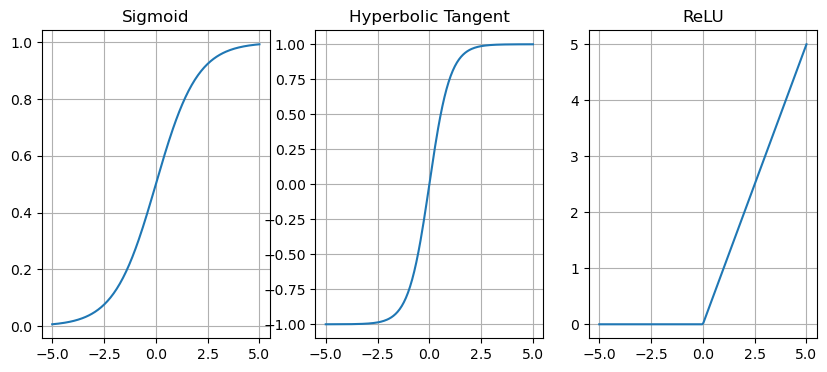

In [24]:
x = np.linspace(-5, 5, 200)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4))
ax[0].plot(x, 1/(1+np.exp(-x)))
ax[0].set_title('Sigmoid')
     
ax[1].plot(x, np.tanh(x))
ax[1].set_title('Hyperbolic Tangent')

ax[2].plot(x, np.maximum(0, x))
ax[2].set_title('ReLU')

for p in ax:
    p.grid()

In [25]:
DATA_DIR = 'Pythonによる予測分析/Hands-On-Predictive-Analytics-with-Python-master/data'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
## Preparation done from Chapter 2
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [26]:
X = diamonds.drop(['cut','color','clarity','price'], axis=1)
y = diamonds['price']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(X_train[['x','y','z']])
X_train['dim_index'] = pca.transform(X_train[['x','y','z']]).flatten()
X_train.drop(['x','y','z'], axis=1, inplace=True)

In [29]:
numerical_features = ['carat', 'depth', 'table', 'dim_index']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train.loc[:, numerical_features] = scaler.transform(X_train[numerical_features])

In [30]:
from tensorflow.keras.models import Sequential
nn_reg = Sequential()

from tensorflow.keras.layers import Dense

In [31]:
n_input = X_train.shape[1]

n_hidden1 = 32
# first hidden layer
nn_reg.add(Dense(units=n_hidden1, activation='relu', input_shape=(n_input,)))
n_hidden2 = 16
# add second hidden layer
nn_reg.add(Dense(units=n_hidden2, activation='relu'))
n_hidden3 = 8
# add third hidden layer
nn_reg.add(Dense(units=n_hidden3, activation='relu'))

In [32]:
# output layer
nn_reg.add(Dense(units=1, activation=None))

nn_reg.predict(X_train.iloc[:5,:])

1/1 [==============================] - 0s 256ms/step


array([[0.29714152],
       [0.15241072],
       [0.1027948 ],
       [0.00451721],
       [0.09429573]], dtype=float32)

In [33]:
## compiling step
nn_reg.compile(loss='mean_squared_error', optimizer='adam')

nn_reg.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                704       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [34]:
batch_size = 64
n_epochs = 50
nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
759/759 [==============================] - 3s 3ms/step - loss: 15744705.0000
Epoch 2/50
759/759 [==============================] - 1s 2ms/step - loss: 1827953.8750
Epoch 3/50
759/759 [==============================] - 2s 2ms/step - loss: 1230309.0000
Epoch 4/50
759/759 [==============================] - 1s 2ms/step - loss: 1036469.7500
Epoch 5/50
759/759 [==============================] - 1s 1ms/step - loss: 928412.8125
Epoch 6/50
759/759 [==============================] - 1s 1ms/step - loss: 843959.6875
Epoch 7/50
759/759 [==============================] - 1s 2ms/step - loss: 777524.1875
Epoch 8/50
759/759 [==============================] - 1s 2ms/step - loss: 731747.9375
Epoch 9/50
759/759 [==============================] - 1s 1ms/step - loss: 694812.0000
Epoch 10/50
759/759 [==============================] - 1s 1ms/step - loss: 671063.3125
Epoch 11/50
759/759 [==============================] - 1s 2ms/step - loss: 650817.1875
Epoch 12/50
759/759 [==========================

In [35]:
## PCA for dimentionality reduction:
X_test['dim_index'] = pca.transform(X_test[['x','y','z']]).flatten()
X_test.drop(['x','y','z'], axis=1, inplace=True)
## Scale our numerical features so they have zero mean and a variance of one
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [36]:
from sklearn.metrics import mean_squared_error
y_pred_train = nn_reg.predict(X_train)
y_pred_test = nn_reg.predict(X_test)
train_mse = mean_squared_error(y_true=y_train, y_pred=y_pred_train)
test_mse = mean_squared_error(y_true=y_test, y_pred=y_pred_test)
print("Train MSE: {:0.3f} \nTest MSE: {:0.3f}".format(train_mse/1e6, test_mse/1e6))

169/169 [==============================] - 0s 2ms/step
Train MSE: 0.378 
Test MSE: 0.379


In [37]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))

In [38]:
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

nn_reg2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1408      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 1)                

In [39]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1)

Epoch 1/300
683/683 [==============================] - 4s 4ms/step - loss: 4369522.5000 - mse: 4369522.5000 - mae: 997.0073 - val_loss: 831335.5625 - val_mse: 831335.5625 - val_mae: 465.2978
Epoch 2/300
683/683 [==============================] - 2s 3ms/step - loss: 662573.8125 - mse: 662573.8125 - mae: 422.8953 - val_loss: 600511.7500 - val_mse: 600511.7500 - val_mae: 393.7845
Epoch 3/300
683/683 [==============================] - 2s 3ms/step - loss: 494173.9062 - mse: 494173.9062 - mae: 376.2286 - val_loss: 485103.6562 - val_mse: 485103.6562 - val_mae: 366.9771
Epoch 4/300
683/683 [==============================] - 2s 2ms/step - loss: 407238.7188 - mse: 407238.7188 - mae: 351.7365 - val_loss: 407721.5938 - val_mse: 407721.5938 - val_mae: 346.7424
Epoch 5/300
683/683 [==============================] - 3s 4ms/step - loss: 370930.4688 - mse: 370930.4688 - mae: 337.1924 - val_loss: 386535.8438 - val_mse: 386535.8438 - val_mae: 343.6381
Epoch 6/300
683/683 [==============================] 

683/683 [==============================] - 1s 2ms/step - loss: 291025.4375 - mse: 291025.4375 - mae: 294.3612 - val_loss: 324763.8750 - val_mse: 324763.8750 - val_mae: 309.7680
Epoch 45/300
683/683 [==============================] - 2s 2ms/step - loss: 290653.2812 - mse: 290653.2812 - mae: 294.2323 - val_loss: 324404.8125 - val_mse: 324404.8125 - val_mae: 305.4147
Epoch 46/300
683/683 [==============================] - 2s 2ms/step - loss: 286299.8438 - mse: 286299.8438 - mae: 291.4864 - val_loss: 313536.5000 - val_mse: 313536.5000 - val_mae: 293.3689
Epoch 47/300
683/683 [==============================] - 2s 2ms/step - loss: 287222.8125 - mse: 287222.8125 - mae: 290.9433 - val_loss: 311517.8438 - val_mse: 311517.8438 - val_mae: 295.8442
Epoch 48/300
683/683 [==============================] - 2s 2ms/step - loss: 284824.0312 - mse: 284824.0312 - mae: 291.4292 - val_loss: 301640.8750 - val_mse: 301640.8750 - val_mae: 287.0664
Epoch 49/300
683/683 [==============================] - 2s 2ms/

683/683 [==============================] - 2s 2ms/step - loss: 267885.0625 - mse: 267885.0625 - mae: 279.3936 - val_loss: 305171.1562 - val_mse: 305171.1562 - val_mae: 283.0490
Epoch 88/300
683/683 [==============================] - 1s 2ms/step - loss: 268414.5312 - mse: 268414.5312 - mae: 279.0742 - val_loss: 302577.4688 - val_mse: 302577.4688 - val_mae: 284.2076
Epoch 89/300
683/683 [==============================] - 1s 2ms/step - loss: 265102.3438 - mse: 265102.3438 - mae: 278.8444 - val_loss: 314611.0000 - val_mse: 314611.0000 - val_mae: 306.6673
Epoch 90/300
683/683 [==============================] - 1s 2ms/step - loss: 271917.0000 - mse: 271917.0000 - mae: 282.0518 - val_loss: 306127.1250 - val_mse: 306127.1250 - val_mae: 294.9871
Epoch 91/300
683/683 [==============================] - 2s 2ms/step - loss: 268178.5625 - mse: 268178.5625 - mae: 280.5637 - val_loss: 319099.2188 - val_mse: 319099.2188 - val_mae: 300.8765
Epoch 92/300
683/683 [==============================] - 1s 2ms/

683/683 [==============================] - 1s 2ms/step - loss: 249567.5312 - mse: 249567.5312 - mae: 270.1441 - val_loss: 330797.3750 - val_mse: 330797.3750 - val_mae: 294.4984
Epoch 131/300
683/683 [==============================] - 2s 2ms/step - loss: 259871.3125 - mse: 259871.3125 - mae: 277.6863 - val_loss: 341946.2812 - val_mse: 341946.2812 - val_mae: 317.0249
Epoch 132/300
683/683 [==============================] - 2s 3ms/step - loss: 253318.0938 - mse: 253318.0938 - mae: 271.4786 - val_loss: 351666.5625 - val_mse: 351666.5625 - val_mae: 327.9128
Epoch 133/300
683/683 [==============================] - 1s 2ms/step - loss: 252160.1719 - mse: 252160.1719 - mae: 270.6630 - val_loss: 296438.0938 - val_mse: 296438.0938 - val_mae: 287.1961
Epoch 134/300
683/683 [==============================] - 1s 2ms/step - loss: 251554.2344 - mse: 251554.2344 - mae: 271.6848 - val_loss: 319682.4062 - val_mse: 319682.4062 - val_mae: 300.7018
Epoch 135/300
683/683 [==============================] - 2s

Epoch 173/300
683/683 [==============================] - 1s 2ms/step - loss: 240922.2812 - mse: 240922.2812 - mae: 266.1427 - val_loss: 315884.0000 - val_mse: 315884.0000 - val_mae: 295.6739
Epoch 174/300
683/683 [==============================] - 2s 2ms/step - loss: 240045.3125 - mse: 240045.3125 - mae: 265.6542 - val_loss: 383194.2500 - val_mse: 383194.2500 - val_mae: 350.0624
Epoch 175/300
683/683 [==============================] - 1s 2ms/step - loss: 240724.4375 - mse: 240724.4375 - mae: 265.4183 - val_loss: 326836.9375 - val_mse: 326836.9375 - val_mae: 305.2425
Epoch 176/300
683/683 [==============================] - 2s 2ms/step - loss: 238956.0469 - mse: 238956.0469 - mae: 264.4963 - val_loss: 313882.2812 - val_mse: 313882.2812 - val_mae: 300.0449
Epoch 177/300
683/683 [==============================] - 2s 3ms/step - loss: 239941.5312 - mse: 239941.5312 - mae: 266.6358 - val_loss: 334216.1250 - val_mse: 334216.1250 - val_mae: 310.1543
Epoch 178/300
683/683 [======================

Epoch 216/300
683/683 [==============================] - 1s 2ms/step - loss: 230725.7188 - mse: 230725.7188 - mae: 261.8868 - val_loss: 315250.9062 - val_mse: 315250.9062 - val_mae: 293.2726
Epoch 217/300
683/683 [==============================] - 2s 2ms/step - loss: 229688.6719 - mse: 229688.6719 - mae: 261.6676 - val_loss: 312078.7812 - val_mse: 312078.7812 - val_mae: 291.7247
Epoch 218/300
683/683 [==============================] - 2s 2ms/step - loss: 226435.0312 - mse: 226435.0312 - mae: 260.4103 - val_loss: 348004.9062 - val_mse: 348004.9062 - val_mae: 310.9478
Epoch 219/300
683/683 [==============================] - 1s 2ms/step - loss: 231459.2812 - mse: 231459.2812 - mae: 263.1135 - val_loss: 340550.1562 - val_mse: 340550.1562 - val_mae: 302.9850
Epoch 220/300
683/683 [==============================] - 2s 3ms/step - loss: 229947.6719 - mse: 229947.6719 - mae: 262.6679 - val_loss: 327056.2188 - val_mse: 327056.2188 - val_mae: 309.2601
Epoch 221/300
683/683 [======================

Epoch 259/300
683/683 [==============================] - 1s 2ms/step - loss: 216575.3750 - mse: 216575.3750 - mae: 255.8930 - val_loss: 322156.4375 - val_mse: 322156.4375 - val_mae: 298.5898
Epoch 260/300
683/683 [==============================] - 2s 2ms/step - loss: 218247.2812 - mse: 218247.2812 - mae: 256.0992 - val_loss: 318400.3125 - val_mse: 318400.3125 - val_mae: 293.1287
Epoch 261/300
683/683 [==============================] - 2s 3ms/step - loss: 220435.1562 - mse: 220435.1562 - mae: 259.3977 - val_loss: 325847.1875 - val_mse: 325847.1875 - val_mae: 292.1080
Epoch 262/300
683/683 [==============================] - 2s 2ms/step - loss: 219577.6406 - mse: 219577.6406 - mae: 257.3614 - val_loss: 344070.1250 - val_mse: 344070.1250 - val_mae: 319.5412
Epoch 263/300
683/683 [==============================] - 1s 2ms/step - loss: 218699.0312 - mse: 218699.0312 - mae: 257.8042 - val_loss: 322596.5938 - val_mse: 322596.5938 - val_mae: 299.5210
Epoch 264/300
683/683 [======================

In [40]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


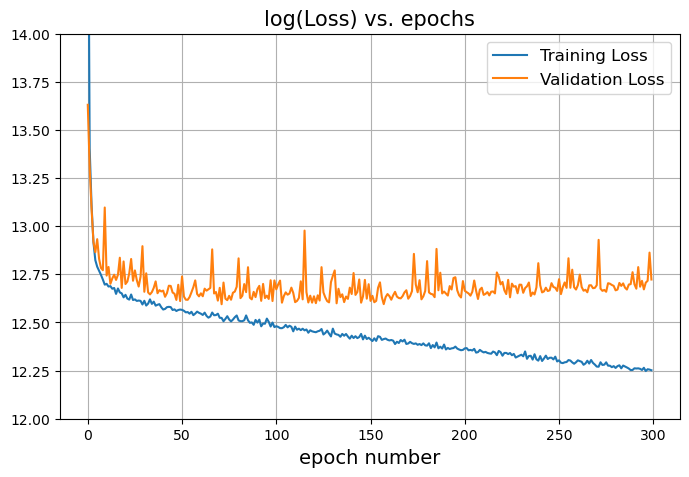

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stoping = EarlyStopping(monitor='val_mean_absolute_error',
                              min_delta=5,
                              patience=20,
                              verbose=1,
                              mode='auto')

In [43]:
nn_reg2 = Sequential()
n_hidden = 64
# hidden layers
nn_reg2.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
nn_reg2.add(Dense(units=n_hidden, activation='relu'))
# output layer
nn_reg2.add(Dense(units=1, activation=None))
# compilation
nn_reg2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

In [44]:
batch_size = 64
n_epochs = 300
history = nn_reg2.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[early_stoping])

Epoch 1/300
683/683 [==============================] - 3s 3ms/step - loss: 4308727.5000 - mse: 4308727.5000 - mae: 988.6815 - val_loss: 865891.3750 - val_mse: 865891.3750 - val_mae: 481.8414
Epoch 2/300
683/683 [==============================] - 2s 2ms/step - loss: 686204.1250 - mse: 686204.1250 - mae: 434.8628 - val_loss: 617787.8125 - val_mse: 617787.8125 - val_mae: 400.5051
Epoch 3/300
683/683 [==============================] - 2s 2ms/step - loss: 526213.9375 - mse: 526213.9375 - mae: 389.6276 - val_loss: 506738.2500 - val_mse: 506738.2500 - val_mae: 376.0782
Epoch 4/300
683/683 [==============================] - 1s 2ms/step - loss: 429826.5000 - mse: 429826.5000 - mae: 363.4735 - val_loss: 416835.1875 - val_mse: 416835.1875 - val_mae: 349.8455
Epoch 5/300
683/683 [==============================] - 2s 2ms/step - loss: 392301.3125 - mse: 392301.3125 - mae: 350.6867 - val_loss: 404552.4062 - val_mse: 404552.4062 - val_mae: 351.6559
Epoch 6/300
683/683 [==============================] 

Epoch 19/300
683/683 [==============================] - 2s 2ms/step - loss: 320416.3750 - mse: 320416.3750 - mae: 310.6755 - val_loss: 329677.8438 - val_mse: 329677.8438 - val_mae: 311.0997
Epoch 20/300
683/683 [==============================] - 2s 2ms/step - loss: 316028.4375 - mse: 316028.4375 - mae: 308.6459 - val_loss: 351030.0000 - val_mse: 351030.0000 - val_mae: 326.5193
Epoch 21/300
683/683 [==============================] - 2s 2ms/step - loss: 318949.1875 - mse: 318949.1875 - mae: 311.8606 - val_loss: 340355.5312 - val_mse: 340355.5312 - val_mae: 310.9927
Epoch 22/300
683/683 [==============================] - 1s 2ms/step - loss: 313387.1250 - mse: 313387.1250 - mae: 306.5738 - val_loss: 343473.7188 - val_mse: 343473.7188 - val_mae: 322.1086
Epoch 23/300
683/683 [==============================] - 1s 2ms/step - loss: 310476.0938 - mse: 310476.0938 - mae: 304.5790 - val_loss: 337740.9375 - val_mse: 337740.9375 - val_mae: 303.5007
Epoch 24/300
683/683 [============================

Epoch 37/300
683/683 [==============================] - 1s 2ms/step - loss: 297766.2188 - mse: 297766.2188 - mae: 298.0898 - val_loss: 320011.4062 - val_mse: 320011.4062 - val_mae: 294.0062
Epoch 38/300
683/683 [==============================] - 1s 2ms/step - loss: 301872.4375 - mse: 301872.4375 - mae: 301.6261 - val_loss: 320976.6562 - val_mse: 320976.6562 - val_mae: 297.6300
Epoch 39/300
683/683 [==============================] - 2s 2ms/step - loss: 303259.6562 - mse: 303259.6562 - mae: 300.1548 - val_loss: 317289.9688 - val_mse: 317289.9688 - val_mae: 301.2698
Epoch 40/300
683/683 [==============================] - 2s 2ms/step - loss: 295762.7500 - mse: 295762.7500 - mae: 297.0484 - val_loss: 319304.6562 - val_mse: 319304.6562 - val_mae: 300.4186
Epoch 41/300
683/683 [==============================] - 1s 2ms/step - loss: 293237.7500 - mse: 293237.7500 - mae: 295.0763 - val_loss: 326634.3125 - val_mse: 326634.3125 - val_mae: 304.9247
Epoch 42/300
683/683 [============================

Epoch 55/300
683/683 [==============================] - 2s 2ms/step - loss: 285385.6875 - mse: 285385.6875 - mae: 290.9032 - val_loss: 313361.6562 - val_mse: 313361.6562 - val_mae: 295.0628
Epoch 56/300
683/683 [==============================] - 1s 2ms/step - loss: 288067.0938 - mse: 288067.0938 - mae: 291.1934 - val_loss: 322546.1562 - val_mse: 322546.1562 - val_mae: 297.2401
Epoch 57/300
683/683 [==============================] - 1s 2ms/step - loss: 282566.4062 - mse: 282566.4062 - mae: 289.2570 - val_loss: 331479.5000 - val_mse: 331479.5000 - val_mae: 304.2213
Epoch 58/300
683/683 [==============================] - 2s 2ms/step - loss: 281767.0625 - mse: 281767.0625 - mae: 289.0206 - val_loss: 318324.2500 - val_mse: 318324.2500 - val_mae: 302.3995
Epoch 59/300
683/683 [==============================] - 1s 2ms/step - loss: 287690.1875 - mse: 287690.1875 - mae: 291.2841 - val_loss: 315593.2812 - val_mse: 315593.2812 - val_mae: 297.3986
Epoch 60/300
683/683 [============================

Epoch 73/300
683/683 [==============================] - 1s 2ms/step - loss: 274626.6562 - mse: 274626.6562 - mae: 284.1284 - val_loss: 343896.1250 - val_mse: 343896.1250 - val_mae: 323.2456
Epoch 74/300
683/683 [==============================] - 2s 2ms/step - loss: 275145.5625 - mse: 275145.5625 - mae: 284.6857 - val_loss: 306770.8750 - val_mse: 306770.8750 - val_mae: 287.8185
Epoch 75/300
683/683 [==============================] - 1s 2ms/step - loss: 282138.0625 - mse: 282138.0625 - mae: 288.0709 - val_loss: 302211.1250 - val_mse: 302211.1250 - val_mae: 286.9872
Epoch 76/300
683/683 [==============================] - 1s 2ms/step - loss: 275357.7812 - mse: 275357.7812 - mae: 283.9831 - val_loss: 311915.5000 - val_mse: 311915.5000 - val_mae: 292.3147
Epoch 77/300
683/683 [==============================] - 2s 2ms/step - loss: 272738.2500 - mse: 272738.2500 - mae: 282.3116 - val_loss: 309549.5000 - val_mse: 309549.5000 - val_mae: 288.1929
Epoch 78/300
683/683 [============================

Epoch 91/300
683/683 [==============================] - 2s 2ms/step - loss: 269721.2500 - mse: 269721.2500 - mae: 281.1938 - val_loss: 332125.6562 - val_mse: 332125.6562 - val_mae: 309.2929
Epoch 92/300
683/683 [==============================] - 1s 2ms/step - loss: 273377.9375 - mse: 273377.9375 - mae: 283.3246 - val_loss: 330075.3438 - val_mse: 330075.3438 - val_mae: 307.3523
Epoch 93/300
683/683 [==============================] - 1s 2ms/step - loss: 265539.7188 - mse: 265539.7188 - mae: 279.2303 - val_loss: 299147.3125 - val_mse: 299147.3125 - val_mae: 285.7194
Epoch 94/300
683/683 [==============================] - 2s 2ms/step - loss: 270294.1250 - mse: 270294.1250 - mae: 282.7478 - val_loss: 341961.5000 - val_mse: 341961.5000 - val_mae: 312.8419
Epoch 95/300
683/683 [==============================] - 1s 2ms/step - loss: 271377.2812 - mse: 271377.2812 - mae: 281.6019 - val_loss: 308194.2812 - val_mse: 308194.2812 - val_mae: 290.5799
Epoch 96/300
683/683 [============================

Epoch 109/300
683/683 [==============================] - 1s 2ms/step - loss: 267649.7812 - mse: 267649.7812 - mae: 279.5919 - val_loss: 299694.2500 - val_mse: 299694.2500 - val_mae: 288.7313
Epoch 110/300
683/683 [==============================] - 2s 2ms/step - loss: 261386.5938 - mse: 261386.5938 - mae: 277.4586 - val_loss: 311191.7188 - val_mse: 311191.7188 - val_mae: 295.0172
Epoch 111/300
683/683 [==============================] - 1s 2ms/step - loss: 265794.2812 - mse: 265794.2812 - mae: 279.1534 - val_loss: 306817.9375 - val_mse: 306817.9375 - val_mae: 289.6080
Epoch 112/300
683/683 [==============================] - 1s 2ms/step - loss: 262441.6875 - mse: 262441.6875 - mae: 276.4283 - val_loss: 307169.6250 - val_mse: 307169.6250 - val_mae: 289.1039
Epoch 113/300
683/683 [==============================] - 1s 2ms/step - loss: 266378.8125 - mse: 266378.8125 - mae: 279.3985 - val_loss: 306771.9688 - val_mse: 306771.9688 - val_mae: 288.0879
Epoch 114/300
683/683 [======================

Epoch 127/300
683/683 [==============================] - 1s 2ms/step - loss: 257283.1719 - mse: 257283.1719 - mae: 274.8450 - val_loss: 321848.5000 - val_mse: 321848.5000 - val_mae: 299.5090
Epoch 128/300
683/683 [==============================] - 2s 2ms/step - loss: 260146.4531 - mse: 260146.4531 - mae: 276.9826 - val_loss: 305366.8750 - val_mse: 305366.8750 - val_mae: 291.5257
Epoch 129/300
683/683 [==============================] - 2s 2ms/step - loss: 255839.7500 - mse: 255839.7500 - mae: 275.1648 - val_loss: 308217.1875 - val_mse: 308217.1875 - val_mae: 290.9680
Epoch 130/300
683/683 [==============================] - 1s 2ms/step - loss: 254716.4062 - mse: 254716.4062 - mae: 273.4795 - val_loss: 343173.3125 - val_mse: 343173.3125 - val_mae: 295.7427
Epoch 131/300
683/683 [==============================] - 1s 2ms/step - loss: 263484.4062 - mse: 263484.4062 - mae: 280.4925 - val_loss: 354686.5625 - val_mse: 354686.5625 - val_mae: 323.2725
Epoch 132/300
683/683 [======================

Epoch 145/300
683/683 [==============================] - 1s 2ms/step - loss: 253563.9219 - mse: 253563.9219 - mae: 274.0670 - val_loss: 313584.1875 - val_mse: 313584.1875 - val_mae: 300.0034
Epoch 146/300
683/683 [==============================] - 1s 2ms/step - loss: 255554.9219 - mse: 255554.9219 - mae: 274.2513 - val_loss: 299240.7188 - val_mse: 299240.7188 - val_mae: 284.7947
Epoch 147/300
683/683 [==============================] - 2s 2ms/step - loss: 250864.1094 - mse: 250864.1094 - mae: 272.3252 - val_loss: 307403.2812 - val_mse: 307403.2812 - val_mae: 297.0675
Epoch 148/300
683/683 [==============================] - 2s 2ms/step - loss: 255270.9219 - mse: 255270.9219 - mae: 274.1924 - val_loss: 345551.9062 - val_mse: 345551.9062 - val_mae: 319.9773
Epoch 149/300
683/683 [==============================] - 1s 2ms/step - loss: 250564.6094 - mse: 250564.6094 - mae: 271.3653 - val_loss: 300007.9375 - val_mse: 300007.9375 - val_mae: 288.4128
Epoch 150/300
683/683 [======================

Epoch 163/300
683/683 [==============================] - 2s 2ms/step - loss: 247342.2812 - mse: 247342.2812 - mae: 269.7241 - val_loss: 322583.6562 - val_mse: 322583.6562 - val_mae: 300.9204
Epoch 164/300
683/683 [==============================] - 1s 2ms/step - loss: 243750.8125 - mse: 243750.8125 - mae: 268.7945 - val_loss: 323559.9375 - val_mse: 323559.9375 - val_mae: 302.5253
Epoch 165/300
683/683 [==============================] - 1s 2ms/step - loss: 246992.9062 - mse: 246992.9062 - mae: 270.4549 - val_loss: 323035.8125 - val_mse: 323035.8125 - val_mae: 302.7683
Epoch 166/300
683/683 [==============================] - 2s 2ms/step - loss: 244221.6719 - mse: 244221.6719 - mae: 270.2134 - val_loss: 304069.5000 - val_mse: 304069.5000 - val_mae: 287.2092
Epoch 167/300
683/683 [==============================] - 2s 2ms/step - loss: 250592.4375 - mse: 250592.4375 - mae: 272.6589 - val_loss: 313431.9062 - val_mse: 313431.9062 - val_mae: 296.2982
Epoch 168/300
683/683 [======================

Epoch 181/300
683/683 [==============================] - 1s 2ms/step - loss: 242953.0781 - mse: 242953.0781 - mae: 268.0499 - val_loss: 390061.4688 - val_mse: 390061.4688 - val_mae: 348.6108
Epoch 182/300
683/683 [==============================] - 2s 2ms/step - loss: 244805.1719 - mse: 244805.1719 - mae: 269.2266 - val_loss: 315418.6875 - val_mse: 315418.6875 - val_mae: 291.1978
Epoch 183/300
683/683 [==============================] - 1s 2ms/step - loss: 239541.8125 - mse: 239541.8125 - mae: 267.0390 - val_loss: 315097.9375 - val_mse: 315097.9375 - val_mae: 299.0179
Epoch 184/300
683/683 [==============================] - 1s 2ms/step - loss: 244182.2344 - mse: 244182.2344 - mae: 270.2426 - val_loss: 309217.6250 - val_mse: 309217.6250 - val_mae: 292.3480
Epoch 185/300
683/683 [==============================] - 2s 4ms/step - loss: 238121.6875 - mse: 238121.6875 - mae: 265.2061 - val_loss: 304969.5938 - val_mse: 304969.5938 - val_mae: 293.2076
Epoch 186/300
683/683 [======================

Epoch 199/300
683/683 [==============================] - 2s 2ms/step - loss: 237036.5156 - mse: 237036.5156 - mae: 266.0312 - val_loss: 313071.9688 - val_mse: 313071.9688 - val_mae: 290.6219
Epoch 200/300
683/683 [==============================] - 2s 2ms/step - loss: 233617.5938 - mse: 233617.5938 - mae: 263.5603 - val_loss: 345422.7188 - val_mse: 345422.7188 - val_mae: 327.7284
Epoch 201/300
683/683 [==============================] - 2s 2ms/step - loss: 237438.3281 - mse: 237438.3281 - mae: 266.0379 - val_loss: 307414.0938 - val_mse: 307414.0938 - val_mae: 291.6829
Epoch 202/300
683/683 [==============================] - 1s 2ms/step - loss: 238766.0469 - mse: 238766.0469 - mae: 267.7592 - val_loss: 309590.8750 - val_mse: 309590.8750 - val_mae: 295.5848
Epoch 203/300
683/683 [==============================] - 1s 2ms/step - loss: 234021.8281 - mse: 234021.8281 - mae: 263.6229 - val_loss: 314562.3438 - val_mse: 314562.3438 - val_mae: 294.5771
Epoch 204/300
683/683 [======================

Epoch 217/300
683/683 [==============================] - 2s 2ms/step - loss: 233704.6406 - mse: 233704.6406 - mae: 265.5147 - val_loss: 328745.4688 - val_mse: 328745.4688 - val_mae: 304.3957
Epoch 218/300
683/683 [==============================] - 2s 2ms/step - loss: 230555.0938 - mse: 230555.0938 - mae: 263.6684 - val_loss: 393048.7500 - val_mse: 393048.7500 - val_mae: 329.0958
Epoch 219/300
683/683 [==============================] - 2s 2ms/step - loss: 234467.0312 - mse: 234467.0312 - mae: 266.1216 - val_loss: 327676.0312 - val_mse: 327676.0312 - val_mae: 304.0014
Epoch 220/300
683/683 [==============================] - 2s 2ms/step - loss: 234636.6250 - mse: 234636.6250 - mae: 266.3730 - val_loss: 324578.9375 - val_mse: 324578.9375 - val_mae: 309.7329
Epoch 221/300
683/683 [==============================] - 1s 2ms/step - loss: 230875.5156 - mse: 230875.5156 - mae: 263.7227 - val_loss: 320813.2188 - val_mse: 320813.2188 - val_mae: 302.3064
Epoch 222/300
683/683 [======================

Epoch 235/300
683/683 [==============================] - 1s 2ms/step - loss: 230288.7969 - mse: 230288.7969 - mae: 263.6223 - val_loss: 333392.9062 - val_mse: 333392.9062 - val_mae: 301.7848
Epoch 236/300
683/683 [==============================] - 1s 2ms/step - loss: 229976.1719 - mse: 229976.1719 - mae: 262.4221 - val_loss: 317025.6250 - val_mse: 317025.6250 - val_mae: 292.0068
Epoch 237/300
683/683 [==============================] - 2s 2ms/step - loss: 223729.8594 - mse: 223729.8594 - mae: 259.4115 - val_loss: 315664.8125 - val_mse: 315664.8125 - val_mae: 295.7130
Epoch 238/300
683/683 [==============================] - 1s 2ms/step - loss: 230156.6562 - mse: 230156.6562 - mae: 262.1949 - val_loss: 308174.4062 - val_mse: 308174.4062 - val_mae: 290.6986
Epoch 239/300
683/683 [==============================] - 2s 2ms/step - loss: 223549.4688 - mse: 223549.4688 - mae: 259.1747 - val_loss: 323165.7812 - val_mse: 323165.7812 - val_mae: 291.8993
Epoch 240/300
683/683 [======================

Epoch 253/300
683/683 [==============================] - 2s 2ms/step - loss: 221382.5938 - mse: 221382.5938 - mae: 258.6526 - val_loss: 311692.2188 - val_mse: 311692.2188 - val_mae: 290.7189
Epoch 254/300
683/683 [==============================] - 1s 2ms/step - loss: 224726.8906 - mse: 224726.8906 - mae: 260.4910 - val_loss: 344377.9688 - val_mse: 344377.9688 - val_mae: 311.2085
Epoch 255/300
683/683 [==============================] - 1s 2ms/step - loss: 221534.4688 - mse: 221534.4688 - mae: 258.4232 - val_loss: 316977.1875 - val_mse: 316977.1875 - val_mae: 295.8848
Epoch 256/300
683/683 [==============================] - 2s 2ms/step - loss: 226154.8438 - mse: 226154.8438 - mae: 261.1449 - val_loss: 363513.3438 - val_mse: 363513.3438 - val_mae: 335.5606
Epoch 257/300
683/683 [==============================] - 1s 2ms/step - loss: 223217.3750 - mse: 223217.3750 - mae: 259.6745 - val_loss: 311014.9375 - val_mse: 311014.9375 - val_mae: 298.6442
Epoch 258/300
683/683 [======================

Epoch 271/300
683/683 [==============================] - 2s 3ms/step - loss: 216948.9844 - mse: 216948.9844 - mae: 257.0207 - val_loss: 323525.5312 - val_mse: 323525.5312 - val_mae: 310.5104
Epoch 272/300
683/683 [==============================] - 2s 2ms/step - loss: 217178.0000 - mse: 217178.0000 - mae: 257.4831 - val_loss: 410552.5000 - val_mse: 410552.5000 - val_mae: 365.3066
Epoch 273/300
683/683 [==============================] - 1s 2ms/step - loss: 220789.5469 - mse: 220789.5469 - mae: 259.7270 - val_loss: 317277.1875 - val_mse: 317277.1875 - val_mae: 301.0568
Epoch 274/300
683/683 [==============================] - 1s 2ms/step - loss: 217688.0312 - mse: 217688.0312 - mae: 256.9595 - val_loss: 316653.3438 - val_mse: 316653.3438 - val_mae: 294.5056
Epoch 275/300
683/683 [==============================] - 2s 3ms/step - loss: 220209.0625 - mse: 220209.0625 - mae: 259.3341 - val_loss: 321394.1875 - val_mse: 321394.1875 - val_mae: 302.3854
Epoch 276/300
683/683 [======================

Epoch 289/300
683/683 [==============================] - 1s 2ms/step - loss: 212975.5469 - mse: 212975.5469 - mae: 254.5617 - val_loss: 319112.5938 - val_mse: 319112.5938 - val_mae: 298.3302
Epoch 290/300
683/683 [==============================] - 1s 2ms/step - loss: 213742.1094 - mse: 213742.1094 - mae: 255.0835 - val_loss: 327375.8125 - val_mse: 327375.8125 - val_mae: 295.3687
Epoch 291/300
683/683 [==============================] - 2s 2ms/step - loss: 213767.9688 - mse: 213767.9688 - mae: 256.4563 - val_loss: 324736.5000 - val_mse: 324736.5000 - val_mae: 305.7483
Epoch 292/300
683/683 [==============================] - 1s 2ms/step - loss: 213705.6094 - mse: 213705.6094 - mae: 255.7583 - val_loss: 318635.4375 - val_mse: 318635.4375 - val_mae: 298.7476
Epoch 293/300
683/683 [==============================] - 1s 2ms/step - loss: 215917.5156 - mse: 215917.5156 - mae: 257.4373 - val_loss: 360499.2188 - val_mse: 360499.2188 - val_mae: 308.9021
Epoch 294/300
683/683 [======================

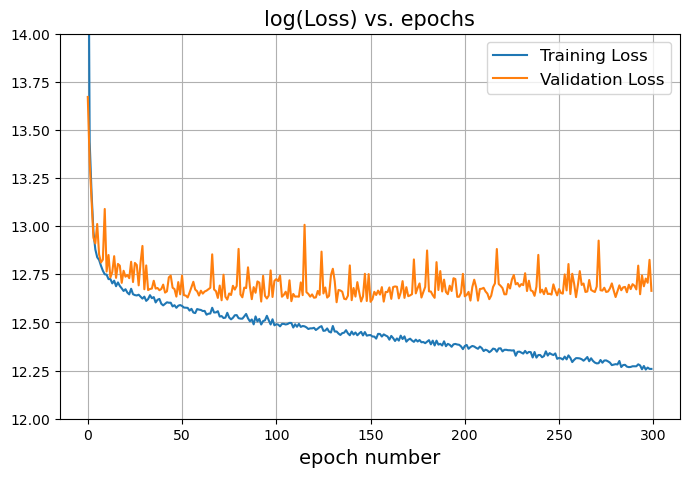

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log(history.history['loss']), label='Training Loss')
ax.plot(np.log(history.history['val_loss']), label='Validation Loss')
ax.set_title("log(Loss) vs. epochs", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.set_ylim(12,14)
ax.grid();

In [46]:
from tensorflow.keras.layers import Dropout

nn_reg_dropout = Sequential()
n_hidden = 64
dropout_rate = 0.2

## Dropout for input layer
nn_reg_dropout.add(Dropout(rate=dropout_rate, input_shape=(n_input,)))
                   
## Now adding four hidden layers + dropout for each of them
nn_reg_dropout.add(Dense(units=n_hidden, activation='relu', input_shape=(n_input,)))
nn_reg_dropout.add(Dropout(rate=dropout_rate))
                   
nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=n_hidden, activation='relu'))
nn_reg_dropout.add(Dropout(rate=dropout_rate))

nn_reg_dropout.add(Dense(units=1, activation=None))

nn_reg_dropout.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 21)                0         
                                                                 
 dense_26 (Dense)            (None, 64)                1408      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [47]:
nn_reg_dropout.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])

batch_size = 64
n_epochs = 300
early_stoping = EarlyStopping(monitor='val_mean_absolute_error',
                              min_delta=5,
                              patience=40,
                              verbose=1,
                              mode='auto')

history = nn_reg_dropout.fit(X_train, y_train,
                      epochs=n_epochs,
                      batch_size=batch_size,
                      validation_split=0.1,
                      callbacks=[early_stoping])

Epoch 1/300
683/683 [==============================] - 4s 3ms/step - loss: 7053309.0000 - mse: 7053309.0000 - mae: 1545.4017 - val_loss: 2085756.3750 - val_mse: 2085756.3750 - val_mae: 769.7360
Epoch 2/300
683/683 [==============================] - 2s 3ms/step - loss: 3374854.2500 - mse: 3374854.2500 - mae: 1094.7532 - val_loss: 1858940.0000 - val_mse: 1858940.0000 - val_mae: 736.1403
Epoch 3/300
683/683 [==============================] - 2s 3ms/step - loss: 3057464.5000 - mse: 3057464.5000 - mae: 1007.0070 - val_loss: 1483539.0000 - val_mse: 1483539.0000 - val_mae: 636.9358
Epoch 4/300
683/683 [==============================] - 2s 3ms/step - loss: 2864389.5000 - mse: 2864389.5000 - mae: 963.8005 - val_loss: 1511741.7500 - val_mse: 1511741.7500 - val_mae: 640.2991
Epoch 5/300
683/683 [==============================] - 2s 3ms/step - loss: 2718129.0000 - mse: 2718129.0000 - mae: 935.6998 - val_loss: 1822836.8750 - val_mse: 1822836.8750 - val_mae: 711.7562
Epoch 6/300
683/683 [===========

683/683 [==============================] - 2s 3ms/step - loss: 2467263.7500 - mse: 2467263.7500 - mae: 868.9764 - val_loss: 1862559.3750 - val_mse: 1862559.3750 - val_mae: 728.8509
Epoch 19/300
683/683 [==============================] - 2s 2ms/step - loss: 2477671.5000 - mse: 2477671.5000 - mae: 876.4301 - val_loss: 2148613.0000 - val_mse: 2148613.0000 - val_mae: 806.0160
Epoch 20/300
683/683 [==============================] - 2s 3ms/step - loss: 2445250.0000 - mse: 2445250.0000 - mae: 869.2844 - val_loss: 2403227.5000 - val_mse: 2403227.5000 - val_mae: 845.1542
Epoch 21/300
683/683 [==============================] - 2s 2ms/step - loss: 2477513.5000 - mse: 2477513.5000 - mae: 872.0410 - val_loss: 1846366.1250 - val_mse: 1846366.1250 - val_mae: 747.9387
Epoch 22/300
683/683 [==============================] - 2s 3ms/step - loss: 2470259.0000 - mse: 2470259.0000 - mae: 871.1238 - val_loss: 1857427.6250 - val_mse: 1857427.6250 - val_mae: 762.0301
Epoch 23/300
683/683 [=====================

683/683 [==============================] - 2s 2ms/step - loss: 2425592.7500 - mse: 2425592.7500 - mae: 856.3867 - val_loss: 2003673.7500 - val_mse: 2003673.7500 - val_mae: 813.3707
Epoch 37/300
683/683 [==============================] - 2s 3ms/step - loss: 2413263.7500 - mse: 2413263.7500 - mae: 853.2079 - val_loss: 1566885.8750 - val_mse: 1566885.8750 - val_mae: 728.7786
Epoch 38/300
683/683 [==============================] - 2s 3ms/step - loss: 2381279.2500 - mse: 2381279.2500 - mae: 853.1931 - val_loss: 2101964.2500 - val_mse: 2101964.2500 - val_mae: 828.3885
Epoch 39/300
683/683 [==============================] - 2s 2ms/step - loss: 2383474.0000 - mse: 2383474.0000 - mae: 851.4038 - val_loss: 2108675.7500 - val_mse: 2108675.7500 - val_mae: 817.0156
Epoch 40/300
683/683 [==============================] - 2s 3ms/step - loss: 2368725.0000 - mse: 2368725.0000 - mae: 845.5479 - val_loss: 1970233.6250 - val_mse: 1970233.6250 - val_mae: 790.0434
Epoch 41/300
683/683 [=====================

683/683 [==============================] - 2s 3ms/step - loss: 2389605.5000 - mse: 2389605.5000 - mae: 843.1194 - val_loss: 2240469.2500 - val_mse: 2240469.2500 - val_mae: 822.9880
Epoch 54/300
683/683 [==============================] - 2s 2ms/step - loss: 2225202.0000 - mse: 2225202.0000 - mae: 822.2472 - val_loss: 2170035.7500 - val_mse: 2170035.7500 - val_mae: 819.4163
Epoch 55/300
683/683 [==============================] - 2s 3ms/step - loss: 2285892.5000 - mse: 2285892.5000 - mae: 829.8669 - val_loss: 1909734.0000 - val_mse: 1909734.0000 - val_mae: 785.2586
Epoch 56/300
683/683 [==============================] - 2s 2ms/step - loss: 2385703.0000 - mse: 2385703.0000 - mae: 843.7384 - val_loss: 1655212.2500 - val_mse: 1655212.2500 - val_mae: 717.5930
Epoch 57/300
683/683 [==============================] - 2s 3ms/step - loss: 2247291.7500 - mse: 2247291.7500 - mae: 828.3816 - val_loss: 1864231.6250 - val_mse: 1864231.6250 - val_mae: 762.3020
Epoch 58/300
683/683 [=====================

683/683 [==============================] - 2s 2ms/step - loss: 2178904.5000 - mse: 2178904.5000 - mae: 818.8688 - val_loss: 1664289.5000 - val_mse: 1664289.5000 - val_mae: 720.3036
Epoch 72/300
683/683 [==============================] - 2s 2ms/step - loss: 2159481.7500 - mse: 2159481.7500 - mae: 816.1904 - val_loss: 1722072.7500 - val_mse: 1722072.7500 - val_mae: 700.9698
Epoch 73/300
683/683 [==============================] - 2s 4ms/step - loss: 2263971.2500 - mse: 2263971.2500 - mae: 826.3599 - val_loss: 1731149.6250 - val_mse: 1731149.6250 - val_mae: 737.4047
Epoch 74/300
683/683 [==============================] - 2s 2ms/step - loss: 2205512.7500 - mse: 2205512.7500 - mae: 819.6540 - val_loss: 1990750.2500 - val_mse: 1990750.2500 - val_mae: 804.1240
Epoch 75/300
683/683 [==============================] - 2s 3ms/step - loss: 2215623.2500 - mse: 2215623.2500 - mae: 825.6459 - val_loss: 2522659.5000 - val_mse: 2522659.5000 - val_mae: 866.4257
Epoch 76/300
683/683 [=====================

683/683 [==============================] - 2s 3ms/step - loss: 2184128.2500 - mse: 2184128.2500 - mae: 811.9818 - val_loss: 2306100.0000 - val_mse: 2306100.0000 - val_mae: 827.6115
Epoch 89/300
683/683 [==============================] - 2s 3ms/step - loss: 2154684.7500 - mse: 2154684.7500 - mae: 810.4866 - val_loss: 2236497.0000 - val_mse: 2236497.0000 - val_mae: 828.9092
Epoch 90/300
683/683 [==============================] - 2s 3ms/step - loss: 2139597.7500 - mse: 2139597.7500 - mae: 804.0485 - val_loss: 1857213.5000 - val_mse: 1857213.5000 - val_mae: 740.9695
Epoch 91/300
683/683 [==============================] - 2s 3ms/step - loss: 2192766.2500 - mse: 2192766.2500 - mae: 810.5774 - val_loss: 2090653.6250 - val_mse: 2090653.6250 - val_mae: 790.1575
Epoch 92/300
683/683 [==============================] - 2s 3ms/step - loss: 2177951.2500 - mse: 2177951.2500 - mae: 808.8908 - val_loss: 1683790.0000 - val_mse: 1683790.0000 - val_mae: 724.4362
Epoch 93/300
683/683 [=====================

683/683 [==============================] - 2s 2ms/step - loss: 2113930.2500 - mse: 2113930.2500 - mae: 803.8907 - val_loss: 2112009.0000 - val_mse: 2112009.0000 - val_mae: 821.4019
Epoch 107/300
683/683 [==============================] - 2s 3ms/step - loss: 2079765.8750 - mse: 2079765.8750 - mae: 797.0839 - val_loss: 2065095.7500 - val_mse: 2065095.7500 - val_mae: 810.8649
Epoch 108/300
683/683 [==============================] - 2s 3ms/step - loss: 2042284.8750 - mse: 2042284.8750 - mae: 795.9890 - val_loss: 1310385.0000 - val_mse: 1310385.0000 - val_mae: 675.1811
Epoch 109/300
683/683 [==============================] - 2s 2ms/step - loss: 2086773.7500 - mse: 2086773.7500 - mae: 795.2845 - val_loss: 1719677.2500 - val_mse: 1719677.2500 - val_mae: 745.2274
Epoch 110/300
683/683 [==============================] - 2s 3ms/step - loss: 2121227.2500 - mse: 2121227.2500 - mae: 804.1631 - val_loss: 1839858.3750 - val_mse: 1839858.3750 - val_mae: 761.9032
Epoch 111/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 2116784.2500 - mse: 2116784.2500 - mae: 799.6351 - val_loss: 1860007.8750 - val_mse: 1860007.8750 - val_mae: 797.8967
Epoch 124/300
683/683 [==============================] - 2s 2ms/step - loss: 2098574.7500 - mse: 2098574.7500 - mae: 792.1489 - val_loss: 1982417.1250 - val_mse: 1982417.1250 - val_mae: 840.2744
Epoch 125/300
683/683 [==============================] - 2s 3ms/step - loss: 2138080.7500 - mse: 2138080.7500 - mae: 803.1095 - val_loss: 1938093.2500 - val_mse: 1938093.2500 - val_mae: 794.0544
Epoch 126/300
683/683 [==============================] - 2s 2ms/step - loss: 2084893.1250 - mse: 2084893.1250 - mae: 792.2218 - val_loss: 2020226.2500 - val_mse: 2020226.2500 - val_mae: 805.7288
Epoch 127/300
683/683 [==============================] - 2s 3ms/step - loss: 2077615.7500 - mse: 2077615.7500 - mae: 794.0272 - val_loss: 1815227.3750 - val_mse: 1815227.3750 - val_mae: 788.8083
Epoch 128/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 2064768.1250 - mse: 2064768.1250 - mae: 789.6749 - val_loss: 2232888.5000 - val_mse: 2232888.5000 - val_mae: 857.4405
Epoch 142/300
683/683 [==============================] - 2s 3ms/step - loss: 2096549.8750 - mse: 2096549.8750 - mae: 793.3436 - val_loss: 2057213.8750 - val_mse: 2057213.8750 - val_mae: 842.1444
Epoch 143/300
683/683 [==============================] - 2s 3ms/step - loss: 2120643.0000 - mse: 2120643.0000 - mae: 798.0641 - val_loss: 2075353.8750 - val_mse: 2075353.8750 - val_mae: 857.5130
Epoch 144/300
683/683 [==============================] - 2s 2ms/step - loss: 2025020.6250 - mse: 2025020.6250 - mae: 788.2931 - val_loss: 2002361.3750 - val_mse: 2002361.3750 - val_mae: 820.9023
Epoch 145/300
683/683 [==============================] - 2s 3ms/step - loss: 2060854.1250 - mse: 2060854.1250 - mae: 787.4323 - val_loss: 2037184.8750 - val_mse: 2037184.8750 - val_mae: 872.5433
Epoch 146/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 2040569.0000 - mse: 2040569.0000 - mae: 777.8172 - val_loss: 2102809.7500 - val_mse: 2102809.7500 - val_mae: 862.8551
Epoch 159/300
683/683 [==============================] - 2s 3ms/step - loss: 1948377.5000 - mse: 1948377.5000 - mae: 770.0710 - val_loss: 2274746.5000 - val_mse: 2274746.5000 - val_mae: 882.6905
Epoch 160/300
683/683 [==============================] - 2s 2ms/step - loss: 2036495.2500 - mse: 2036495.2500 - mae: 782.8172 - val_loss: 2103229.2500 - val_mse: 2103229.2500 - val_mae: 848.4543
Epoch 161/300
683/683 [==============================] - 2s 3ms/step - loss: 1946085.6250 - mse: 1946085.6250 - mae: 774.9323 - val_loss: 2411978.7500 - val_mse: 2411978.7500 - val_mae: 917.5427
Epoch 162/300
683/683 [==============================] - 2s 3ms/step - loss: 2026214.5000 - mse: 2026214.5000 - mae: 779.4696 - val_loss: 2537714.2500 - val_mse: 2537714.2500 - val_mae: 953.1633
Epoch 163/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 2003795.8750 - mse: 2003795.8750 - mae: 775.4108 - val_loss: 2291187.0000 - val_mse: 2291187.0000 - val_mae: 919.4963
Epoch 177/300
683/683 [==============================] - 2s 4ms/step - loss: 2016185.0000 - mse: 2016185.0000 - mae: 774.7055 - val_loss: 2309465.2500 - val_mse: 2309465.2500 - val_mae: 901.9022
Epoch 178/300
683/683 [==============================] - 3s 4ms/step - loss: 2003675.1250 - mse: 2003675.1250 - mae: 774.2175 - val_loss: 2485952.5000 - val_mse: 2485952.5000 - val_mae: 944.8909
Epoch 179/300
683/683 [==============================] - 2s 2ms/step - loss: 2031341.1250 - mse: 2031341.1250 - mae: 773.5630 - val_loss: 1612337.7500 - val_mse: 1612337.7500 - val_mae: 804.9278
Epoch 180/300
683/683 [==============================] - 2s 3ms/step - loss: 1948143.3750 - mse: 1948143.3750 - mae: 766.6802 - val_loss: 2162356.0000 - val_mse: 2162356.0000 - val_mae: 885.5207
Epoch 181/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 2048913.2500 - mse: 2048913.2500 - mae: 781.4288 - val_loss: 2380551.7500 - val_mse: 2380551.7500 - val_mae: 934.5045
Epoch 194/300
683/683 [==============================] - 2s 2ms/step - loss: 2022276.5000 - mse: 2022276.5000 - mae: 769.8328 - val_loss: 2386584.5000 - val_mse: 2386584.5000 - val_mae: 952.4628
Epoch 195/300
683/683 [==============================] - 2s 3ms/step - loss: 2039231.8750 - mse: 2039231.8750 - mae: 774.9822 - val_loss: 2320928.2500 - val_mse: 2320928.2500 - val_mae: 911.9698
Epoch 196/300
683/683 [==============================] - 2s 3ms/step - loss: 2021827.1250 - mse: 2021827.1250 - mae: 773.1901 - val_loss: 2898346.2500 - val_mse: 2898346.2500 - val_mae: 1011.5005
Epoch 197/300
683/683 [==============================] - 2s 2ms/step - loss: 2016186.5000 - mse: 2016186.5000 - mae: 773.9763 - val_loss: 2362162.0000 - val_mse: 2362162.0000 - val_mae: 931.3791
Epoch 198/300
683/683 [===============

683/683 [==============================] - 2s 3ms/step - loss: 2038707.0000 - mse: 2038707.0000 - mae: 775.0214 - val_loss: 2370839.2500 - val_mse: 2370839.2500 - val_mae: 920.2851
Epoch 212/300
683/683 [==============================] - 2s 3ms/step - loss: 2018036.8750 - mse: 2018036.8750 - mae: 771.8096 - val_loss: 2385680.2500 - val_mse: 2385680.2500 - val_mae: 922.8550
Epoch 213/300
683/683 [==============================] - 2s 3ms/step - loss: 1941914.5000 - mse: 1941914.5000 - mae: 758.6227 - val_loss: 2451567.0000 - val_mse: 2451567.0000 - val_mae: 935.3207
Epoch 214/300
683/683 [==============================] - 2s 3ms/step - loss: 1994468.1250 - mse: 1994468.1250 - mae: 762.9785 - val_loss: 2213337.2500 - val_mse: 2213337.2500 - val_mae: 872.8121
Epoch 215/300
683/683 [==============================] - 2s 3ms/step - loss: 2024616.5000 - mse: 2024616.5000 - mae: 769.4094 - val_loss: 2703561.5000 - val_mse: 2703561.5000 - val_mae: 975.7825
Epoch 216/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 1981431.2500 - mse: 1981431.2500 - mae: 762.0919 - val_loss: 2582711.0000 - val_mse: 2582711.0000 - val_mae: 975.9084
Epoch 229/300
683/683 [==============================] - 2s 2ms/step - loss: 1944381.1250 - mse: 1944381.1250 - mae: 760.2289 - val_loss: 2786541.5000 - val_mse: 2786541.5000 - val_mae: 1001.8261
Epoch 230/300
683/683 [==============================] - 2s 3ms/step - loss: 1957324.1250 - mse: 1957324.1250 - mae: 764.4896 - val_loss: 2842601.2500 - val_mse: 2842601.2500 - val_mae: 1005.9708
Epoch 231/300
683/683 [==============================] - 2s 2ms/step - loss: 1903613.3750 - mse: 1903613.3750 - mae: 756.9966 - val_loss: 2093651.3750 - val_mse: 2093651.3750 - val_mae: 897.9448
Epoch 232/300
683/683 [==============================] - 2s 2ms/step - loss: 1925421.1250 - mse: 1925421.1250 - mae: 758.6871 - val_loss: 2614035.5000 - val_mse: 2614035.5000 - val_mae: 965.0177
Epoch 233/300
683/683 [==============

683/683 [==============================] - 2s 2ms/step - loss: 1952941.6250 - mse: 1952941.6250 - mae: 759.7616 - val_loss: 2148370.7500 - val_mse: 2148370.7500 - val_mae: 906.0823
Epoch 247/300
683/683 [==============================] - 2s 3ms/step - loss: 2030666.1250 - mse: 2030666.1250 - mae: 768.4739 - val_loss: 2574641.5000 - val_mse: 2574641.5000 - val_mae: 972.8051
Epoch 248/300
683/683 [==============================] - 2s 3ms/step - loss: 2028793.1250 - mse: 2028793.1250 - mae: 765.8784 - val_loss: 2707584.5000 - val_mse: 2707584.5000 - val_mae: 989.4808
Epoch 249/300
683/683 [==============================] - 3s 4ms/step - loss: 1935111.6250 - mse: 1935111.6250 - mae: 758.4843 - val_loss: 2585390.7500 - val_mse: 2585390.7500 - val_mae: 977.7461
Epoch 250/300
683/683 [==============================] - 2s 3ms/step - loss: 1954654.8750 - mse: 1954654.8750 - mae: 759.4731 - val_loss: 2585944.5000 - val_mse: 2585944.5000 - val_mae: 957.4501
Epoch 251/300
683/683 [================

683/683 [==============================] - 2s 3ms/step - loss: 1949505.2500 - mse: 1949505.2500 - mae: 759.8050 - val_loss: 2615563.5000 - val_mse: 2615563.5000 - val_mae: 985.8080
Epoch 264/300
683/683 [==============================] - 2s 2ms/step - loss: 1936971.3750 - mse: 1936971.3750 - mae: 754.4882 - val_loss: 2309727.2500 - val_mse: 2309727.2500 - val_mae: 928.0285
Epoch 265/300
683/683 [==============================] - 2s 3ms/step - loss: 2031210.0000 - mse: 2031210.0000 - mae: 762.9537 - val_loss: 2810977.7500 - val_mse: 2810977.7500 - val_mae: 1007.2262
Epoch 266/300
683/683 [==============================] - 2s 2ms/step - loss: 1941094.7500 - mse: 1941094.7500 - mae: 759.3257 - val_loss: 2952324.0000 - val_mse: 2952324.0000 - val_mae: 1029.2932
Epoch 267/300
683/683 [==============================] - 2s 3ms/step - loss: 2040684.3750 - mse: 2040684.3750 - mae: 765.3390 - val_loss: 2615628.0000 - val_mse: 2615628.0000 - val_mae: 971.1445
Epoch 268/300
683/683 [==============

683/683 [==============================] - 2s 3ms/step - loss: 1960236.5000 - mse: 1960236.5000 - mae: 756.7672 - val_loss: 2678592.7500 - val_mse: 2678592.7500 - val_mae: 996.8184
Epoch 282/300
683/683 [==============================] - 2s 3ms/step - loss: 1907001.3750 - mse: 1907001.3750 - mae: 750.1358 - val_loss: 2853719.7500 - val_mse: 2853719.7500 - val_mae: 997.5810
Epoch 283/300
683/683 [==============================] - 2s 3ms/step - loss: 1895219.7500 - mse: 1895219.7500 - mae: 749.5760 - val_loss: 2705060.7500 - val_mse: 2705060.7500 - val_mae: 988.9095
Epoch 284/300
683/683 [==============================] - 2s 2ms/step - loss: 1972573.7500 - mse: 1972573.7500 - mae: 756.4183 - val_loss: 3030702.7500 - val_mse: 3030702.7500 - val_mae: 1044.2532
Epoch 285/300
683/683 [==============================] - 2s 3ms/step - loss: 1962180.8750 - mse: 1962180.8750 - mae: 756.9844 - val_loss: 2993683.7500 - val_mse: 2993683.7500 - val_mae: 1027.0952
Epoch 286/300
683/683 [==============

683/683 [==============================] - 2s 3ms/step - loss: 1971638.2500 - mse: 1971638.2500 - mae: 751.9827 - val_loss: 2958797.7500 - val_mse: 2958797.7500 - val_mae: 1030.2822
Epoch 299/300
683/683 [==============================] - 2s 2ms/step - loss: 1899839.2500 - mse: 1899839.2500 - mae: 749.0541 - val_loss: 3088162.7500 - val_mse: 3088162.7500 - val_mae: 1034.2992
Epoch 300/300
683/683 [==============================] - 2s 3ms/step - loss: 1964692.6250 - mse: 1964692.6250 - mae: 750.9371 - val_loss: 2719899.2500 - val_mse: 2719899.2500 - val_mae: 972.5307


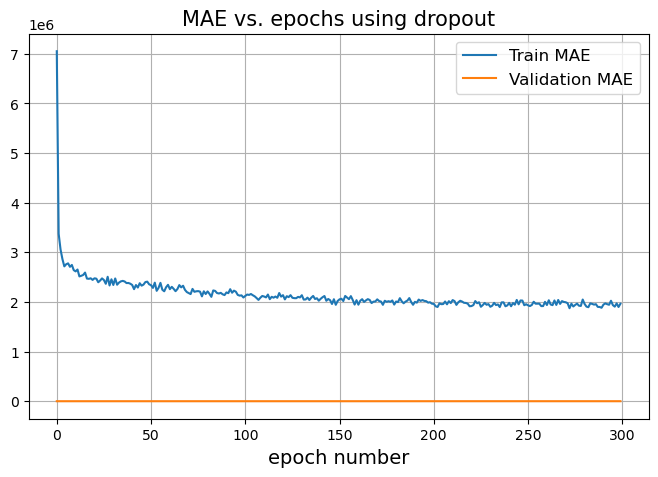

In [48]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(history.history['mse'], label='Train MAE')
ax.plot(history.history['val_mae'], label='Validation MAE')
ax.set_title("MAE vs. epochs using dropout", fontsize=15)
ax.set_xlabel("epoch number", fontsize=14)
ax.legend(fontsize=12)
ax.grid();

In [49]:
#Python機械学習クックブック

In [50]:
#レシピ 20.1
# ライブラリをロード
from sklearn import preprocessing
import numpy as np

# 特徴量を作成
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# 標準化器を作成
scaler = preprocessing.StandardScaler()

# 特徴量を変換
features_standardized = scaler.fit_transform(features)

# 特徴量を表示
features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [51]:
#平均値と標準偏差の表示
print("Mean:", round(features_standardized[:,0].mean()))
print("Standard deviation:", features_standardized[:,0].std())

Mean: 0
Standard deviation: 0.9999999999999999


In [52]:
#レシピ 20.2

# -*- coding: utf-8 -*-

# ライブラリをロード
from keras import models
from keras import layers

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

In [53]:
#レシピ 20.5

#順伝搬ニューラルネットワークを作成

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# 乱数シードを設定
np.random.seed(0)

# 特徴量行列とターゲットベクトルを作成
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# 訓練セットとデータセットに分割
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=32,
                         activation="relu",
                         input_shape=(features_train.shape[1],)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=32, activation="relu"))

# 活性化関数を用いない全結合層を追加
network.add(layers.Dense(units=1))

# ニューラルネットワークをコンパイル
network.compile(loss="mse", # 平均2乗誤差を最小化
                optimizer="RMSprop", # 最適化手法を指定
                metrics=["mse"]) # 性能指標は平均2乗誤差

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=10, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

In [54]:
#レシピ 20.6

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 10000

# IMDB映画データから、データとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# ワンホットエンコードを行って特徴量ベクトルに変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# テストセットのクラスを予測
predicted_target = network.predict(features_test)

##########

# 最初の観測値がクラス1である確率を表示
predicted_target[0]

782/782 [==============================] - 2s 3ms/step


array([0.08507011], dtype=float32)

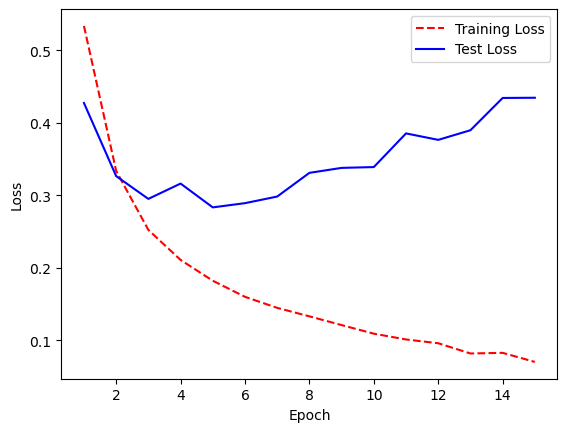

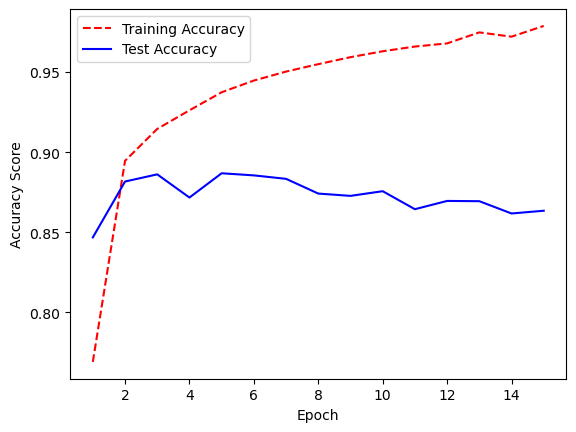

In [55]:
#レシピ 20.7

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 10000

# データをロード and target vector from movie review data
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評のデータをワンホットエンコードして特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲット
                      epochs=15, # エポック数
                      verbose=0, # 出力しない
                      batch_size=1000, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

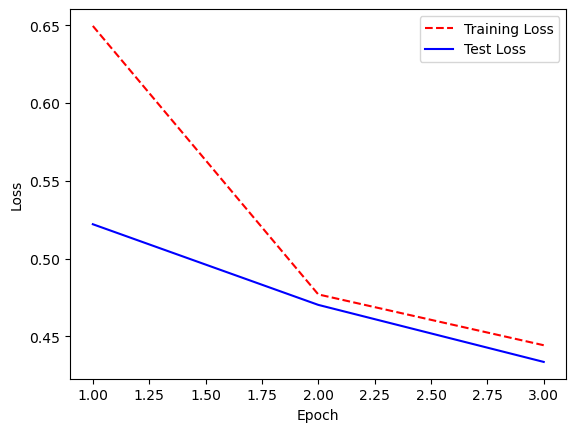

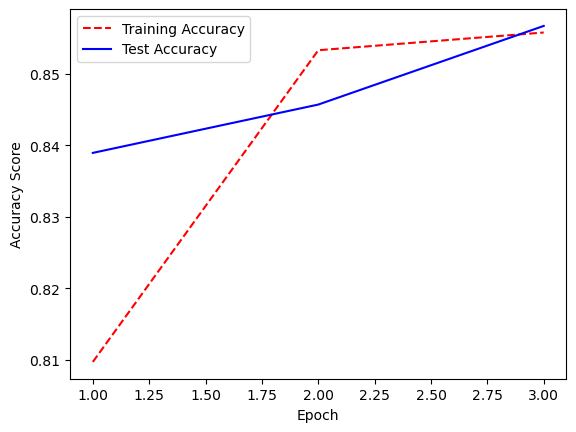

In [56]:
#レシピ 20.8

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(0.01),
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         kernel_regularizer=regularizers.l2(0.01),
                         activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

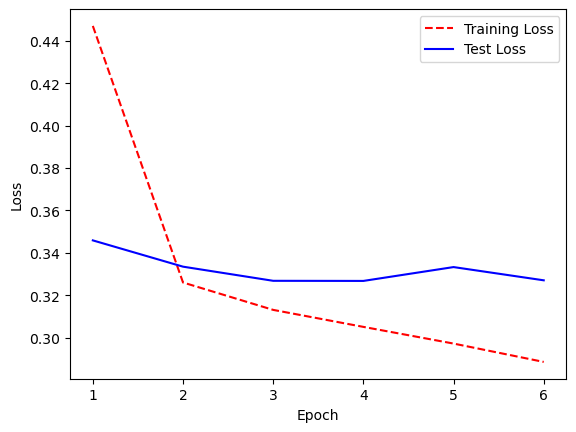

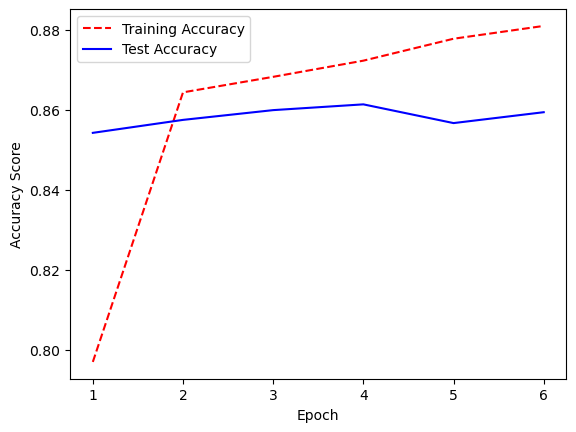

In [57]:
#レシピ 20.9

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# 早期終了を行い、それまでで一番良いモデルをセーブするコールバック関数を設定
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=20, # エポック数
                      callbacks=callbacks, # 早期終了コールバック
                      verbose=0, # エポックごとに状態を表示
                      batch_size=100, # 1バッチの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

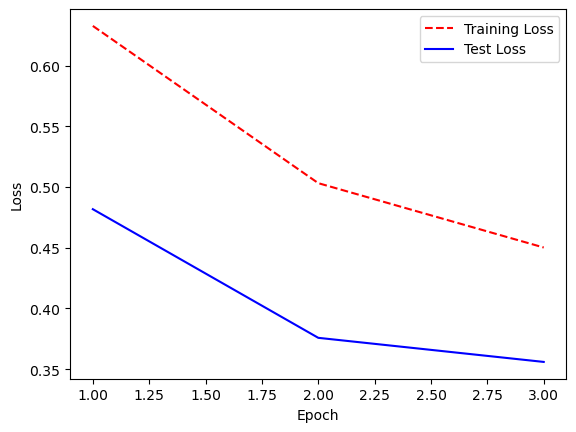

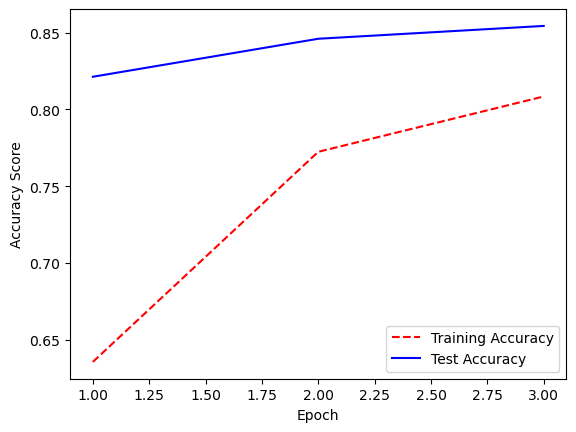

In [58]:
#レシピ 20.10

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 入力層にドロップアウト層を追加
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 直前の隠れ層にドロップアウト層を追加
network.add(layers.Dropout(0.5))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 直前の隠れ層にドロップアウト層を追加
network.add(layers.Dropout(0.5))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

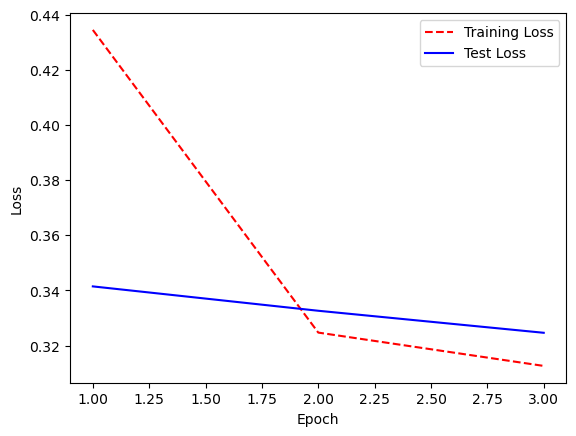

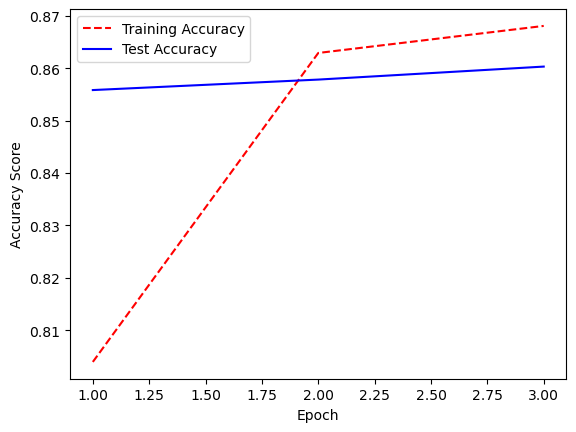

In [59]:
#レシピ 20.11

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評のデータとターゲットベクトルをロード
(data_train, target_train), (data_test, target_test) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードで特徴量行列に変換
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16, activation="relu"))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# チェックポイントをとるようにコールバックを設定
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

# ニューラルネットワークを訓練
history = network.fit(features_train, # 特徴量
                      target_train, # ターゲットベクトル
                      epochs=3, # エポック数
                      callbacks=checkpoint, # チェックポイントをとる
                      verbose=0, # 出力しない
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(features_test, target_test)) # テストデータ

# 訓練ロス、テストロスの経過を取得
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# エポック数のリストを作成
epoch_count = range(1, len(training_loss) + 1)

# ロスの経過をプロット
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

##########

# 訓練精度とテスト精度の経過を取得
training_accuracy = history.history["accuracy"]# M2 米田君からの修正情報
test_accuracy = history.history["val_accuracy"]# M2 米田君からの修正情報
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# 精度の経過をプロット
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show();

In [60]:
#レシピ 21.1

# -*- coding: utf-8 -*-

# ライブラリをロード
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import joblib # M2 米田君からの修正情報

# データをロード
iris = datasets.load_iris()
features = iris.data
target = iris.target

# ランダムフォレストクラス分類器を作成
classifer = RandomForestClassifier()

# ランダムフォレストクラス分類器を訓練
model = classifer.fit(features, target)

# 訓練したモデルをピクルファイルとしてセーブ
joblib.dump(model, "model.pkl")

##########

# モデルをファイルからロード
classifer = joblib.load("model.pkl")

##########

# 新たな観測値を作成
new_observation = [[ 5.2,  3.2,  1.1,  0.1]]

# 観測値のクラスを予測
classifer.predict(new_observation)

##########

# ライブラリをロード
import sklearn

# scikit-learnのバージョンを取得
scikit_version = joblib.__version__

# 訓練したモデルをピクルファイルとしてセーブ
joblib.dump(model, "model_{version}.pkl".format(version=scikit_version))

['model_1.1.1.pkl']

In [61]:
#レシピ 21.2

# -*- coding: utf-8 -*-

# ライブラリをロード
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import load_model

# 乱数シードを設定
np.random.seed(0)

# 利用したい特徴量の数を指定
number_of_features = 1000

# 映画批評データのデータとターゲットベクトルをロードする
(train_data, train_target), (test_data, test_target) = imdb.load_data(
    num_words=number_of_features)

# 映画批評データをワンホットエンコードして特徴量行列に変換
# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode="binary")
test_features = tokenizer.sequences_to_matrix(test_data, mode="binary")

# ニューラルネットワークの作成を開始
network = models.Sequential()

# 活性化関数としてReLUを用いる全結合層を追加
network.add(layers.Dense(units=16,
                         activation="relu",
                         input_shape=(number_of_features,)))

# 活性化関数としてシグモイド関数を用いる全結合層を追加
network.add(layers.Dense(units=1, activation="sigmoid"))

# ニューラルネットワークをコンパイル
network.compile(loss="binary_crossentropy", # クロスエントロピ
                optimizer="rmsprop", # 二乗平均平方根伝搬法
                metrics=["accuracy"]) # 性能指標は精度

# ニューラルネットワークを訓練
history = network.fit(train_features, # 特徴量
                      train_target, # ターゲットベクトル
                      epochs=3, # エポック数
                      verbose=0, # No output
                      batch_size=100, # 1バッチあたりの観測値数
                      validation_data=(test_features, test_target)) # テストデータ

# ニューラルネットワークをセーブ
network.save("model.h5")

###########

# ニューラルネットワークをロード
network = load_model("model.h5")